In [1]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [2]:
# Load the design matrix files to visualize and concatenate
os.chdir('/home/sshankar/audio/des_mat/')
dms = sorted(glob.glob('run*npy'))

In [35]:
# This is the order in which the design matrices are sorted/accessed
dms

['run-10_audio_activations.npy',
 'run-11_audio_activations.npy',
 'run-12_audio_activations.npy',
 'run-1_audio_activations.npy',
 'run-2_audio_activations.npy',
 'run-3_audio_activations.npy',
 'run-4_audio_activations.npy',
 'run-5_audio_activations.npy',
 'run-6_audio_activations.npy',
 'run-7_audio_activations.npy',
 'run-8_audio_activations.npy',
 'run-9_audio_activations.npy']

In [3]:
# This is the data order, referenced by DM order
data_order = [6,7,8,3,4,5,0,1,2,9,10,11]

In [4]:
# Let's change the DM order to reflect data order
dm_data_order = []
for i in range(len(dms)):
    dm_data_order.append(dms[data_order[i]])

In [113]:
dm_data_order

['run-4_audio_activations.npy',
 'run-5_audio_activations.npy',
 'run-6_audio_activations.npy',
 'run-1_audio_activations.npy',
 'run-2_audio_activations.npy',
 'run-3_audio_activations.npy',
 'run-10_audio_activations.npy',
 'run-11_audio_activations.npy',
 'run-12_audio_activations.npy',
 'run-7_audio_activations.npy',
 'run-8_audio_activations.npy',
 'run-9_audio_activations.npy']

In [5]:
# Load the design matrices in the data order and 
# create a large timeseries

events_ts = []

for i in range(len(dms)):
    events_ts.extend(np.load(dm_data_order[i]))

In [158]:
events_arr = np.array(events_ts)

In [161]:
events_arr.shape

(2328, 1)

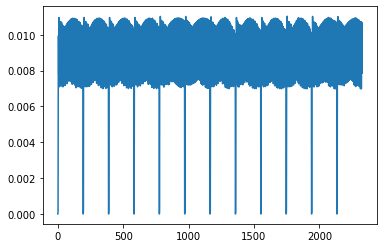

In [168]:
plt.plot(events_arr)

In [6]:
# Load the shared response matrix
os.chdir('/home/sshankar/audio/3mm/fastsrm/')
shared_resp = np.load('shared_resp.npy', allow_pickle=True)

In [162]:
shared_resp[0].shape

(2328,)

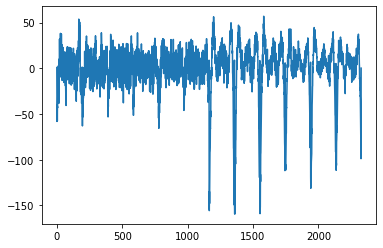

In [32]:
plt.plot(shared_resp[0])

In [164]:
# Calculate correlation coefficients between the 2 timeseries
n_comp = len(shared_resp)
ccs = np.zeros(n_comp)

for i in range(n_comp):
    ccs[i] = np.correlate(events_arr.squeeze(), shared_resp[i])
    
print(ccs)

[ 12.22523559 -12.44720632   5.22930461  -2.31428457   3.81199119
  -4.83134039  -6.17950359   2.06419908   8.98199333   8.70303539
  14.92793602   7.41240516  -8.00685552   7.57677815  -4.82504738
  -1.16333224   4.03378377  12.26707546   6.31543636   8.97443707]


In [165]:
# Calculate correlation coefficients between the 2 timeseries

n_comp = len(shared_resp)
ccs_same = np.zeros((n_comp,n_ts))

for i in range(n_comp):
    ccs_same[i] = np.correlate(events_arr.squeeze(), shared_resp[i], mode='same')

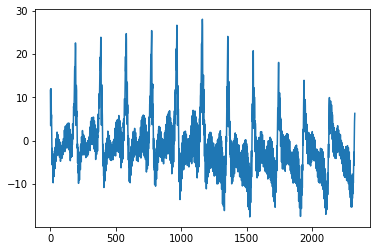

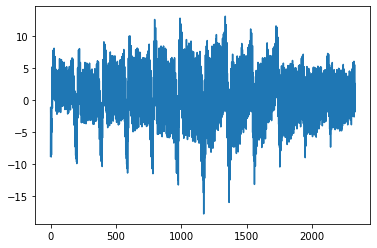

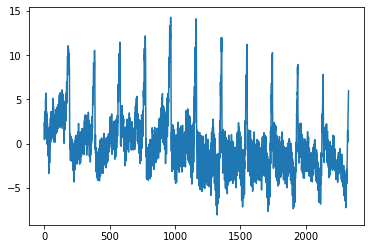

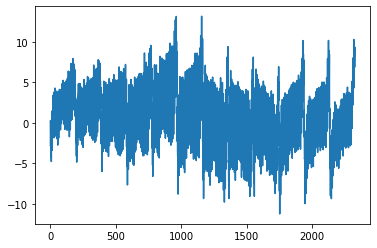

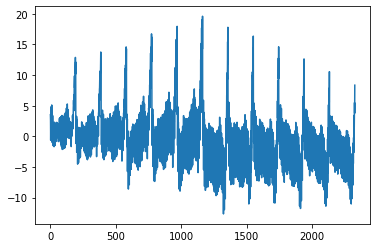

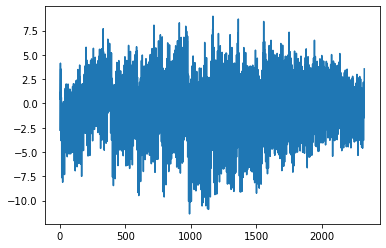

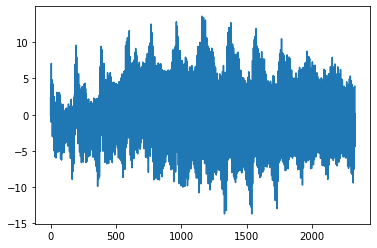

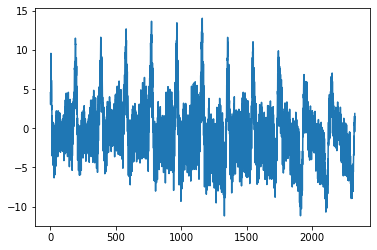

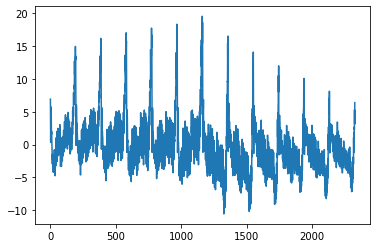

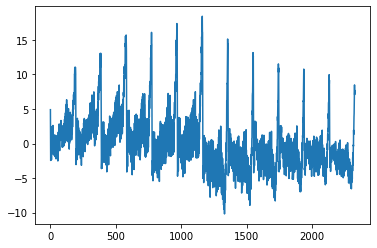

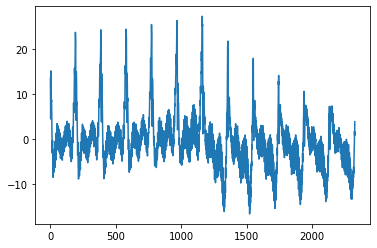

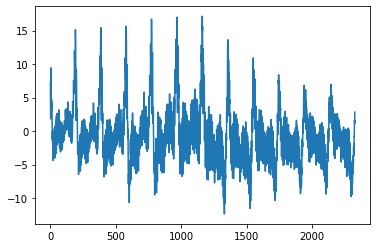

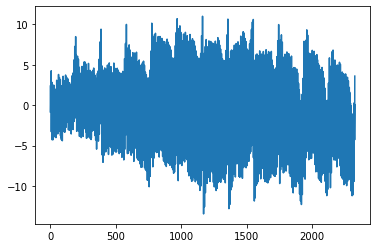

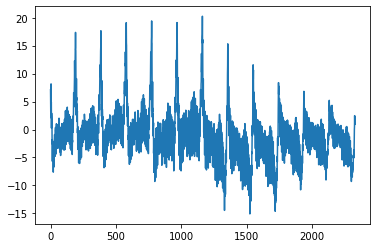

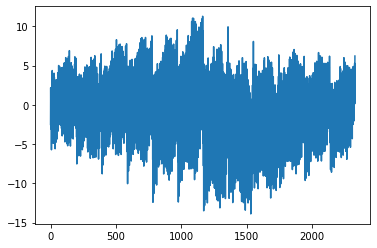

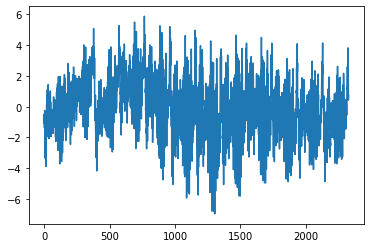

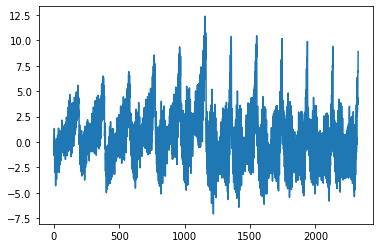

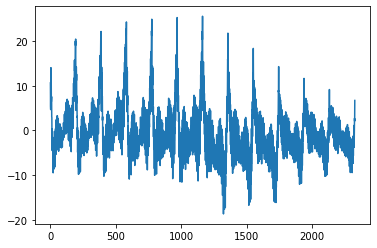

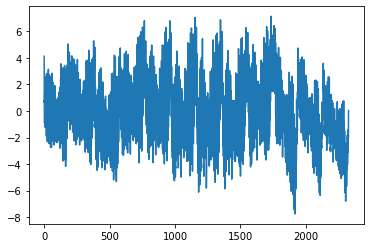

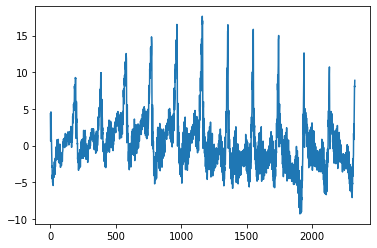

In [167]:
# Plot the cross-correlations
for i in range(n_comp):
    plt.figure()
    plt.plot(ccs_same[i])

In [104]:
ccs_same[0].shape

(2328,)

In [176]:
for i in range(n_comp):
    print(max(ccs_same[i]), np.where(ccs_same[i]==max(ccs_same[i])), '\t',
          min(ccs_same[i]), np.where(ccs_same[i]==min(ccs_same[i])))

28.064386995947626 (array([1162]),) 	 -17.64928891775314 (array([1524]),)
13.10143602500184 (array([1336]),) 	 -17.809165925670055 (array([1171]),)
14.25637769033854 (array([967]),) 	 -8.046721393410396 (array([1323]),)
13.180752267499422 (array([1156]),) 	 -11.258391829898585 (array([1753]),)
19.615682864380997 (array([1163]),) 	 -12.675616680445131 (array([1323]),)
8.967315992229267 (array([1170]),) 	 -11.366905331640593 (array([991]),)
13.584597081580862 (array([1156]),) 	 -13.698298662030474 (array([1538]),)
14.019910679328095 (array([1161]),) 	 -11.19908892776772 (array([1330]),)
19.564025179343943 (array([1161]),) 	 -10.561435000492937 (array([1326]),)
18.434689860580775 (array([1161]),) 	 -10.196477943134317 (array([1331]),)
27.23554902035799 (array([1161]),) 	 -16.699113522465638 (array([1523]),)
17.147232716732976 (array([1161]),) 	 -12.355189901644462 (array([1330]),)
10.998775215032822 (array([1163]),) 	 -13.453988092701707 (array([1171]),)
20.261154930365112 (array([1161]),

In [180]:
# Calculate cross-correlation of the events_ts vector
# with all the shared responses
n_comp = len(shared_resp)
n_ts = len(events_ts)
ccs_full = np.zeros((n_comp, n_ts*2-1))

for i in range(n_comp):
    ccs_full[i] = np.correlate(events_arr.squeeze(), shared_resp[i], mode='full')

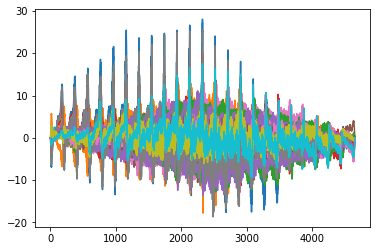

In [181]:
# Plot the cross-correlations
for i in range(n_comp):
    plt.plot(ccs_full[i])

In [182]:
for i in range(n_comp):
    print(max(ccs_full[i]), np.where(ccs_full[i]==max(ccs_full[i])), '\t',
          min(ccs_full[i]), np.where(ccs_full[i]==min(ccs_full[i])))

28.064386995947626 (array([2325]),) 	 -17.64928891775314 (array([2687]),)
13.10143602500184 (array([2499]),) 	 -17.809165925670055 (array([2334]),)
14.25637769033854 (array([2130]),) 	 -8.046721393410396 (array([2486]),)
13.180752267499422 (array([2319]),) 	 -11.258391829898585 (array([2916]),)
19.615682864380997 (array([2326]),) 	 -12.675616680445131 (array([2486]),)
8.967315992229267 (array([2333]),) 	 -11.366905331640593 (array([2154]),)
13.584597081580862 (array([2319]),) 	 -13.698298662030474 (array([2701]),)
14.019910679328095 (array([2324]),) 	 -11.19908892776772 (array([2493]),)
19.564025179343943 (array([2324]),) 	 -10.561435000492937 (array([2489]),)
18.434689860580775 (array([2324]),) 	 -10.196477943134317 (array([2494]),)
27.23554902035799 (array([2324]),) 	 -16.699113522465638 (array([2686]),)
17.147232716732976 (array([2324]),) 	 -12.355189901644462 (array([2493]),)
10.998775215032822 (array([2326]),) 	 -13.453988092701707 (array([2334]),)
20.261154930365112 (array([2324]

In [109]:
n_ts

2328

In [7]:
# Let's load a sample design matrix to see what it has
dm_s4 = np.load('/home/sshankar/design_matrix.npz')

In [8]:
import pandas as pd

In [9]:
dm_df = pd.DataFrame(dm_s4['design_matrix'])

In [142]:
from nistats.reporting import plot_design_matrix

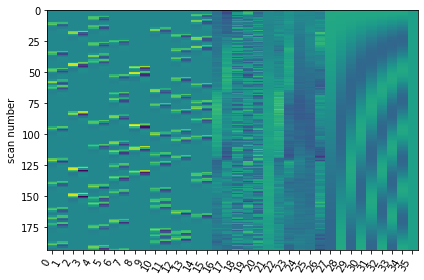

In [200]:
plot_design_matrix(dm_df)

In [199]:
dm_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.082062,-0.177569,0.074215,0.157387,0.036486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101531,0.101521,0.101505,0.101481,0.101451,0.101415,0.101372,0.101322,1.0
1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.068857,-0.158510,-0.131621,0.059431,-0.030113,0.013005,-0.019228,0.027796,-0.000175,-0.000106,0.000148,0.101505,0.101415,0.101265,0.101056,0.100787,0.100458,0.100070,0.099624,1.0
2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.015568,0.033001,-0.070976,-0.185156,0.056321,0.162214,-0.099680,0.010833,-0.000025,0.049026,0.000398,-0.000044,-0.000147,0.101451,0.101202,0.100787,0.100206,0.099462,0.098554,0.097485,0.096256,1.0
3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.630755,0.138712,-0.068223,-0.141888,0.062130,0.100131,-0.056479,0.011952,-0.001113,0.046693,0.000059,-0.000081,-0.000109,0.101372,0.100883,0.100070,0.098936,0.097485,0.095720,0.093648,0.091275,1.0
4,0.000000,0.000000,0.0,0.0,0.015349,0.032744,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.720807,-0.093915,-0.055614,-0.117104,-0.102005,-0.023903,-0.054384,0.016321,-0.005774,0.034352,-0.000819,-0.000286,-0.000064,0.101265,0.100458,0.099118,0.097252,0.094869,0.091983,0.088609,0.084764,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.743993,-0.037394,0.0,0.0,0.002166,0.007329,0.000000,0.000000,0.0,0.0,0.051085,-0.070344,-0.084298,0.015599,0.000000,0.000000,-0.073078,-0.032796,-0.053289,-0.108691,0.077772,0.103926,0.037328,-0.094766,-0.001357,-0.001023,-0.000739,-0.101265,0.100458,-0.099118,0.097252,-0.094869,0.091983,-0.088609,0.084764,1.0
190,0.255731,-0.141825,0.0,0.0,0.514602,0.191862,0.000000,0.000000,0.0,0.0,-0.070296,-0.001807,-0.034020,0.011783,0.000000,0.000000,-0.056021,-0.082196,0.087860,0.068727,0.093501,0.084870,0.035781,-0.136067,-0.001705,-0.000874,-0.001030,-0.101372,0.100883,-0.100070,0.098936,-0.097485,0.095720,-0.093648,0.091275,1.0
191,0.058789,-0.074048,0.0,0.0,0.875016,0.105624,0.000000,0.000000,0.0,0.0,-0.066132,0.009625,-0.017641,0.007166,0.000000,0.000000,-0.043565,-0.073238,-0.079486,-0.010053,-0.009550,0.094614,0.020998,-0.126228,-0.002067,-0.001107,-0.000753,-0.101451,0.101202,-0.100787,0.100206,-0.099462,0.098554,-0.097485,0.096256,1.0
192,-0.069018,-0.002213,0.0,0.0,0.627101,-0.219189,0.132352,0.128401,0.0,0.0,-0.029479,0.009656,-0.003497,0.001755,0.000000,0.000000,-0.039603,-0.063575,-0.094003,-0.044453,0.054646,0.102632,0.051635,-0.123740,-0.001569,-0.001049,-0.000769,-0.101505,0.101415,-0.101265,0.101056,-0.100787,0.100458,-0.100070,0.099624,1.0


In [10]:
dm_s4.close()

In [11]:
dm_df[0]

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
189    0.743993
190    0.255731
191    0.058789
192   -0.069018
193   -0.065788
Name: 0, Length: 194, dtype: float64

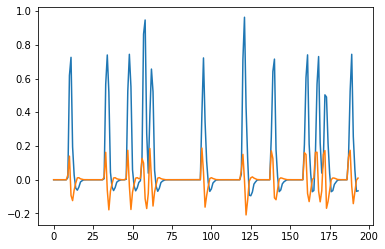

In [14]:
plt.plot(dm_df[0])
plt.plot(dm_df[1])

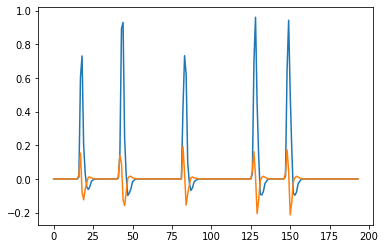

In [15]:
plt.plot(dm_df[2])
plt.plot(dm_df[3])

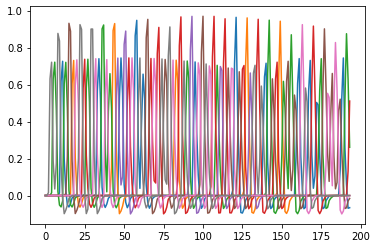

In [50]:
for i, r in enumerate(range(0,15,2)):
    plt.plot(dm_df[r])

In [55]:
sum_dm = np.sum(dm_df.iloc[:,range(0,15,2)], axis=1)

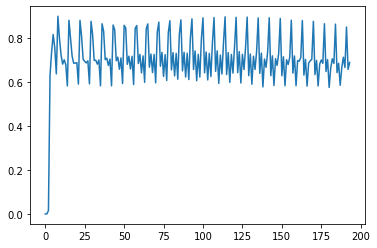

In [56]:
plt.plot(sum_dm)

In [63]:
shared_resp_run1 = np.load('/home/sshankar/audio/3mm/fastsrm/scaled_resp_run1.npy', allow_pickle=True)

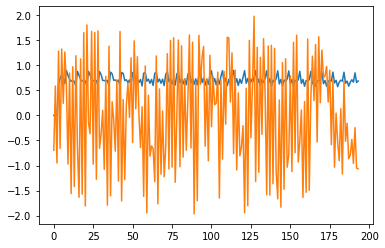

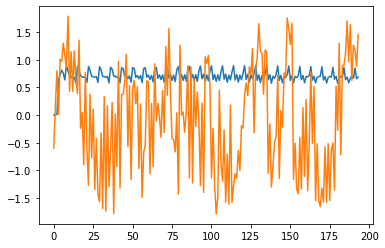

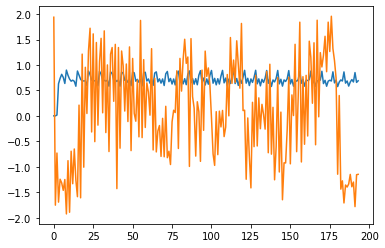

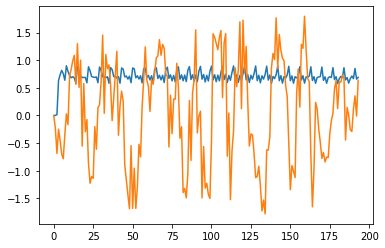

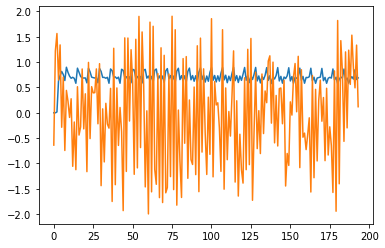

In [66]:
for i in range(5):
    plt.figure()
    plt.plot(sum_dm)
    plt.plot(shared_resp_run1[i])

In [68]:
norm_resp_run1 = np.load('/home/sshankar/audio/3mm/fastsrm/norm_resp_run1.npy', allow_pickle=True)

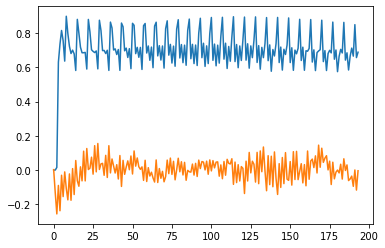

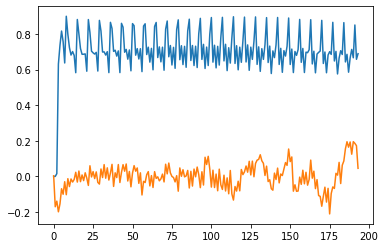

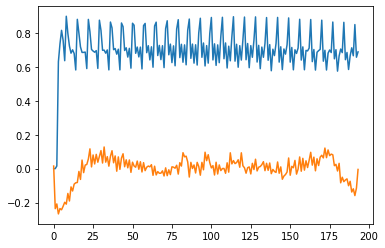

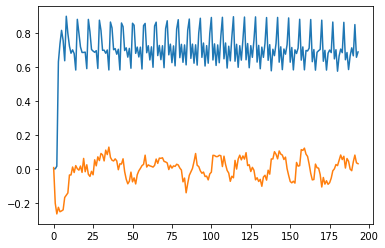

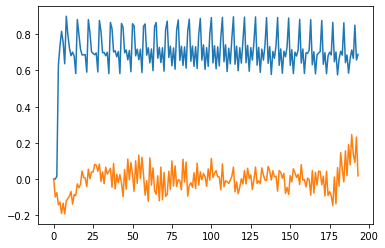

In [69]:
for i in range(5):
    plt.figure()
    plt.plot(sum_dm)
    plt.plot(norm_resp_run1[i])

In [70]:
sum_dm_deriv = np.sum(dm_df.iloc[:,range(0,15)], axis=1)

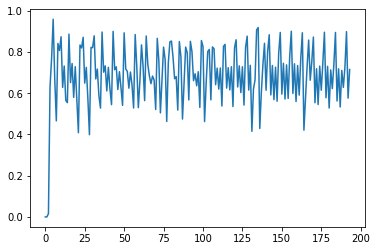

In [71]:
plt.plot(sum_dm_deriv)

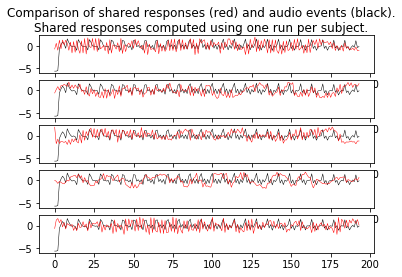

In [95]:
fig, axs = plt.subplots(5)
fig.suptitle('Comparison of shared responses (red) and audio events (black).\nShared responses computed using one run per subject.\n')
for i in range(5):   
    axs[i].plot(scale(sum_dm), color='k', lw=0.5)
    axs[i].plot(shared_resp_run1[i], color='r', lw=0.5)

In [96]:
fig.savefig('audio-ev_SR.pdf')